# Diving into NLTK: The Basics

## Text Analysis with NLTK

### [Centre for Data, Culture & Society](http://cdcs.ed.ac.uk)

Course Instructor: Lucy Havens

Course Dates: March-April 2022

****

**Reference:**

Steven Bird, Ewan Klein, Edward Loper (2019) *Natural Language Processing with Python - Analyzing Text with the Natural Language Toolkit.*  3rd Edition.  https://www.nltk.org/book/

***

NLTK, which stands for Natural Language Toolkit, is a popular coding library for text analysis with the programming language Python.  While Python alone has some basic capabilities for analyzing text, NLTK has much more to offer, as we will see!  This Jupyter Notebook will cover the following concepts:

* [Tokenization](#tok)
* [Frequency counts and distributions](#fre)
* [Normalization](#nor)
* [Stemming](#ste)
* [Lemmatizing](#lem)
* [Part-of-speech tagging](#pos)
* [Collocations and n-grams](#col)

These are the building blocks for more complicated text analysis tasks.  They are generally part of the first step of text analysis called **preprocessing**, which gets your text data formatted in a way that NLTK's methods and functions can easily interpret.

Before we can begin our text analysis, though, we should import the libraries we'll want to use to explore the capabilities of NLTK!

In [53]:
import nltk
from nltk.book import * # the `*` means import all corpora (you could also specify a specific corpus)

# As an alternative to `nltk.download()`, as shown in last Notebook's class, you can specify what
# packages from NLTK to download
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('tagsets')  # part of speech tags
from nltk.draw.dispersion import dispersion_plot as displt

import matplotlib.pyplot as plt   # for drawing charts to visualize data

import re               # the Regular Expression (or RegEx) library, which is useful in combination with NLTK
import string           # another useful library for acccessing lists of all letters, all punctuation, etc.

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/jovyan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


Remember that the names on the left (`text1`, `text2`, ..., `text9`) are **variables** that point to the text corpora on the right (`Moby Dick...`, `Sense and Senibility...`, ..., `The Man Who Was Thursday...`).

I wonder what happens if we try to print one of these?

In [2]:
print(text2)

<Text: Sense and Sensibility by Jane Austen 1811>


Hmm.  That doesn't show us much.  What if we try slicing?

In [3]:
print(text2[0:100])

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.', 'Their', 'estate', 'was', 'large', ',', 'and', 'their', 'residence', 'was', 'at', 'Norland', 'Park', ',', 'in', 'the', 'centre', 'of', 'their', 'property', ',', 'where', ',', 'for', 'many', 'generations', ',', 'they', 'had', 'lived', 'in', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'the', 'general', 'good', 'opinion', 'of', 'their', 'surrounding', 'acquaintance', '.', 'The', 'late', 'owner', 'of', 'this', 'estate', 'was', 'a', 'single', 'man', ',', 'who', 'lived', 'to', 'a', 'very', 'advanced', 'age', ',', 'and', 'who', 'for', 'many', 'years', 'of', 'his', 'life', ',', 'had', 'a', 'constant', 'companion']


 <a id="tok"></a>
You can see that the text has been **tokenized**, or separated into its individual words, numbers, and punctuation marks.

In [4]:
type(text2)

nltk.text.Text

Slicing works for us to view **tokens** in the NLTK Text object, which is the data type of `text2`.  Let's try out some of the methods and functions specific to NLTK, though, as they are designed for working with Text objects!

Let's begin with the `concordance()` method.  We pass a single **token**, as a **string** (type=str), into this method.  What token would you like to see in its different contexts within the text?

In [5]:
text2.concordance('opinion')  # optional parameter: lines=20 (or any number you choose)

Displaying 25 of 63 matches:
anner as to engage the general good opinion of their surrounding acquaintance .
. A great deal too handsome , in my opinion , for any place THEY can ever affor
s was not recommended to their good opinion by any peculiar graces of person or
ionate brother . I have the highest opinion in the world of Edward ' s heart . 
 he is always unwilling to give his opinion on any picture ; but he has an inna
 rapturous delight , which , in her opinion , could alone be called taste . Yet
tly cordial , and if THAT were your opinion , I am sure you could never be civi
s you have ; but I have the highest opinion in the world of his goodness and se
tudied his sentiments and heard his opinion on subjects of literature and taste
 that Edward stood very high in her opinion . She believed the regard to be mut
uld be !" Elinor had given her real opinion to her sister . She could not consi
nd every body was astonished at the opinion of the others . An opportunity was 
 . It was e

By default the `concordance()` method shows 25 contexts in which the input word is used, but you can specify how many contexts you would like to see by saying something like: `text2.concordance('opinion', lines=63`)

In [6]:
text2.concordance('opinion', lines=100)  # it's okay to input a greater number of lines than there are matches

Displaying 63 of 63 matches:
anner as to engage the general good opinion of their surrounding acquaintance .
. A great deal too handsome , in my opinion , for any place THEY can ever affor
s was not recommended to their good opinion by any peculiar graces of person or
ionate brother . I have the highest opinion in the world of Edward ' s heart . 
 he is always unwilling to give his opinion on any picture ; but he has an inna
 rapturous delight , which , in her opinion , could alone be called taste . Yet
tly cordial , and if THAT were your opinion , I am sure you could never be civi
s you have ; but I have the highest opinion in the world of his goodness and se
tudied his sentiments and heard his opinion on subjects of literature and taste
 that Edward stood very high in her opinion . She believed the regard to be mut
uld be !" Elinor had given her real opinion to her sister . She could not consi
nd every body was astonished at the opinion of the others . An opportunity was 
 . It was e

When we talk about the *context* of words (or tokens!) in text analysis, we're referring to the surrounding words of a given word.  Concordances show a bit of context to the left of an input word (just before the word appears) and to the right of that word (just after that word appeared). 

The words "good" and "opinion" seem to occur together quite a bit!  To see the other words appear near that pair, we can use the `common_contexts()` method.  We pass a **list** of tokens (each token as a string) into the method.

In [7]:
text2.common_contexts(["good", "opinion"])

the_of


It seems that "the good opinion of" is the complete phrase in which the pair of words, "good" and "opinion", appear together in this text.  They don't occur together in other contexts!  But what about individually?

We can use the **similar** method to see words that appear in similar contexts, meaning they're surrounded by similar tokens, as the token we input.  Note that we pass in a single token as a string to this method.

In [8]:
print("Words with a similar context as 'good':")
text2.similar("good")

Words with a similar context as 'good':
long large well kind ill handsome short painful so to great young much
expected satisfaction happy self bad charming respectable


In [9]:
print("Words with a similar context as 'opinion':")
text2.similar("opinion")

Words with a similar context as 'opinion':
mind sister side family house heart mother brother situation spirits
eyes life own wishes marriage fortune way time behaviour judgment


Pairs of words that occur together, such as "good" and "opinion," are referred to as **bigrams**, where "bi" indicates two.  **N-grams** are groups of words that occur together, where n is a number of your choice.

To get all the bigrams in a text, we can use the `bigrams()` method, into which we pass the variable referring to the text itself.

In [10]:
bigrams_list = list(nltk.bigrams(text2))
print(bigrams_list[:100])  # prints the first 100 bigrams

[('[', 'Sense'), ('Sense', 'and'), ('and', 'Sensibility'), ('Sensibility', 'by'), ('by', 'Jane'), ('Jane', 'Austen'), ('Austen', '1811'), ('1811', ']'), (']', 'CHAPTER'), ('CHAPTER', '1'), ('1', 'The'), ('The', 'family'), ('family', 'of'), ('of', 'Dashwood'), ('Dashwood', 'had'), ('had', 'long'), ('long', 'been'), ('been', 'settled'), ('settled', 'in'), ('in', 'Sussex'), ('Sussex', '.'), ('.', 'Their'), ('Their', 'estate'), ('estate', 'was'), ('was', 'large'), ('large', ','), (',', 'and'), ('and', 'their'), ('their', 'residence'), ('residence', 'was'), ('was', 'at'), ('at', 'Norland'), ('Norland', 'Park'), ('Park', ','), (',', 'in'), ('in', 'the'), ('the', 'centre'), ('centre', 'of'), ('of', 'their'), ('their', 'property'), ('property', ','), (',', 'where'), ('where', ','), (',', 'for'), ('for', 'many'), ('many', 'generations'), ('generations', ','), (',', 'they'), ('they', 'had'), ('had', 'lived'), ('lived', 'in'), ('in', 'so'), ('so', 'respectable'), ('respectable', 'a'), ('a', 'mann

Last class we looked quickly at a **dispersion plot**, which is a chart that visualizes when particular tokens appear within a text.  Let's try making another one of those.  We pass in a list of individual tokens, where each token is a string, to make a dispersion plot.

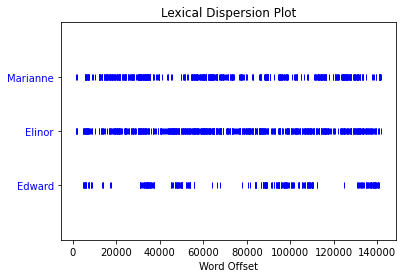

In [11]:
# Character names (note that they can't be multiple words, or there won't be a match)
text2.dispersion_plot(["Marianne", "Elinor", "Edward"])

How does this plot reflect the text?

Marianne and Elinor are the main characters of the book 'Sense and Sensibility,' so it makes sense that we'd see them consistently throughout the text!  Edward is a supporting character, so we see that his name occurs less frequently.

Let's try another text.  NLTK includes some books that were digitized for [Project Gutenberg](https://www.gutenberg.org).


In [15]:
from nltk.corpus import gutenberg
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Let's look at one of those books, Alice's Adventures in Wonderland (with the fileid `carroll-alice.txt`), to practice tokenizing on our own.

In [16]:
aiw = nltk.corpus.gutenberg.raw("carroll-alice.txt")
print(type(aiw))

<class 'str'>


In [17]:
aiw[:100]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

We can tokenize the string of Alice's Adventures in Wonderland to split it into individual words and punctuation using the function `word_tokenize()`.  We can split the string into individual sentences using the function `sent_tokenize()`.  Both tokenization functions output a list of strings.

In [26]:
aiw_tokens = word_tokenize(aiw)
print("Total tokens:", len(aiw_tokens))
print("Sample:", aiw_tokens[0:100])

Total tokens: 33493
Sample: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot']


In [31]:
aiw_sents = sent_tokenize(aiw)
print("Total sentences:", len(aiw_sents))
print("Sample:", aiw_sents[0:5])

Total sentences: 1625
Sample: ["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I.", "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'", 'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.', "There was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, 'Oh dear!", 'Oh dear!']


What if I want to know the number of words, not tokens (so excluding punctuation marks)?

In [33]:
aiw_words = [word for word in aiw_tokens if word.isalpha()]  # List comprehension
print("Total words:", len(aiw_words))
### Same as: ###
# aiw_words = []
# for word in aiw_tokens:
#     if word.isalpha():
#         aiw_words += [word]  # same as aiw_words = aiw_words + [word]

Total words: 25464


What if we want to know the size of the vocabulary, or the number of unique words, in Alice's Adventures in Wonderland?

Remember that Python (and NLTK) consider capitalized and lowercased words to be different, so in order to count the number of unique words, we must **casefold** the text, changing all words to lowercase.  NLTK has a simple method for this: `.lower()`.  

*Note:* Casefolding is a form of **normalization**.

In [34]:
aiw_lower = [word.lower() for word in aiw_words]
print(aiw_lower[:10])

['alice', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'chapter', 'i', 'down']


Next, we can use another Python data type called a **set** to quickly get all the unique words from our list of casefolded words:

In [37]:
aiw_vocab = set(aiw_lower)
print("Vocabulary size:",len(aiw_vocab),"words")

Vocabulary size: 2470 words


Other forms of **normalization** involve reducing words to their root form.  For example, the words "happy" and "happiness" have the same root and very similar meanings.  There are two ways NLTK provides to reduce words to their root form:

* **Stemming**: reduces words to a root form where the root is *not* a valid word itself

    In our example, the stem of "happy" and "happiness" would be "happ."


* **Lemmatizing**: reduces words to a root form where the root *is* a valid word itself, determined based on whether it exists in WordNet's list of valid English words

    In our example, the stem of "happy" and "happiness" would be "happy."
    
There are different approaches to stemming and lemmatization we can use in NLTK.  Let's see how they differ...

In [38]:
porter = nltk.PorterStemmer()
porter_stemmed = [porter.stem(word) for word in aiw_lower]  # only includes alphabetic tokens
print(porter_stemmed[500:550])

['true', 'down', 'down', 'down', 'would', 'the', 'fall', 'never', 'come', 'to', 'an', 'end', 'i', 'wonder', 'how', 'mani', 'mile', 'i', 'fallen', 'by', 'thi', 'time', 'she', 'said', 'aloud', 'i', 'must', 'be', 'get', 'somewher', 'near', 'the', 'centr', 'of', 'the', 'earth', 'let', 'me', 'see', 'that', 'would', 'be', 'four', 'thousand', 'mile', 'down', 'i', 'think', 'for', 'you']


In [39]:
lancaster = nltk.LancasterStemmer()
lancaster_stemmed = [lancaster.stem(word) for word in aiw_lower] # only includes alphabetic tokens
print(lancaster_stemmed[500:550])

['tru', 'down', 'down', 'down', 'would', 'the', 'fal', 'nev', 'com', 'to', 'an', 'end', 'i', 'wond', 'how', 'many', 'mil', 'i', 'fal', 'by', 'thi', 'tim', 'she', 'said', 'aloud', 'i', 'must', 'be', 'get', 'somewh', 'near', 'the', 'cent', 'of', 'the', 'ear', 'let', 'me', 'see', 'that', 'would', 'be', 'four', 'thousand', 'mil', 'down', 'i', 'think', 'for', 'you']


In [42]:
wnl = nltk.WordNetLemmatizer()
lemmatized = [wnl.lemmatize(word) for word in aiw_lower]  # only includes alphabetic tokens
print(lemmatized[500:550])

['true', 'down', 'down', 'down', 'would', 'the', 'fall', 'never', 'come', 'to', 'an', 'end', 'i', 'wonder', 'how', 'many', 'mile', 'i', 'fallen', 'by', 'this', 'time', 'she', 'said', 'aloud', 'i', 'must', 'be', 'getting', 'somewhere', 'near', 'the', 'centre', 'of', 'the', 'earth', 'let', 'me', 'see', 'that', 'would', 'be', 'four', 'thousand', 'mile', 'down', 'i', 'think', 'for', 'you']


What differences do you spot in the output samples of stems and lemmas?

*This is why it's always useful to print out samples of the data you're working with as you're coding!*

So what can we do with words once we've stemmed or lemmatized them?  Well, we could count the unique stems and lemmas, to get a different perspective on the size of the Lewis Carroll's vocabulary in Alice's Adventures in Wonderland, just as we did with the complete words.  

We could also count the frequency at which these root forms of words appear, giving us a sense of what the most common words are in the book.  Let's try that!  We'll use NLTK's `FreqDist()` function (for calculating and visualizing frequency distributions).

In [49]:
fdist_lemmas = FreqDist(lemmatized)
fdist_lemmas  # pairs of lemmas and their counts

FreqDist({'the': 1616, 'a': 887, 'and': 810, 'to': 720, 'it': 596, 'she': 544, 'i': 533, 'of': 499, 'said': 462, 'alice': 396, ...})

Now we can ask how often a particular lemma appears using the `fdist_lemmas` variable we created:

In [48]:
print(fdist_lemmas['wonder'])

18


To get an easier overview, we can use visualization.  Let's create a line chart of the top 10 lemmas:

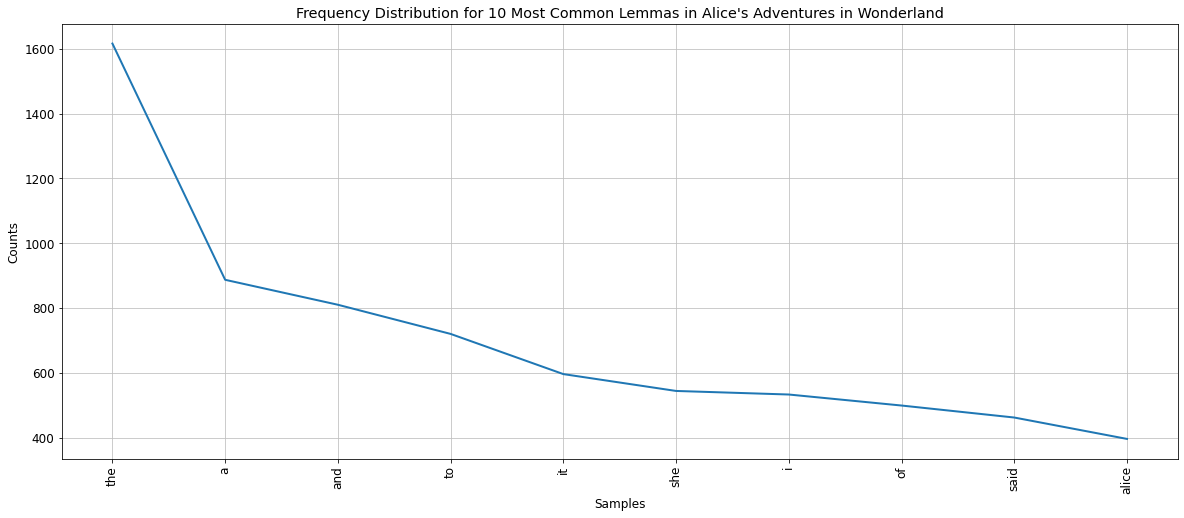

In [55]:
plt.figure(figsize = (20, 8))
plt.rc('font', size=12)
number_of_tokens = 10 
fdist_lemmas.plot(number_of_tokens, title='Frequency Distribution for '+str(number_of_tokens)+" Most Common Lemmas in Alice's Adventures in Wonderland")
plt.show()

Hmmm.  Some of these words don't tell us a lot.  It's pretty logical that words like "the" and "she" would be used a lot, but it doesn't tell us much about what goes on in the book.

These small words that occur frequently but don't always carry large meaning, particularly in books and longer texts, are called **stopwords**.  We can filter them out with a `stopwords()` method and try re-plotting this frequency distribution.

In [65]:
to_exclude = stopwords.words('english')  # english since the book is in English

# What other words might we want to exclude?
to_exclude += ['alice', "said"]

In [66]:
# use list comprehension to filter
lemmatized_filtered = [l for l in lemmatized if (len(l) > 2 and not l in to_exclude)]

In [67]:
fdist_lemmas_filtered = FreqDist(lemmatized_filtered)
print("Total words after filtering:", fdist_lemmas_filtered.N())
print("50 most common words after filtering:", fdist_lemmas_filtered.most_common(50))

Total words after filtering: 10771
50 most common words after filtering: [('little', 128), ('one', 100), ('would', 90), ('know', 90), ('could', 86), ('like', 86), ('went', 83), ('thing', 79), ('thought', 76), ('queen', 76), ('time', 74), ('see', 67), ('king', 63), ('head', 60), ('turtle', 60), ('began', 58), ('hatter', 57), ('mock', 56), ('say', 55), ('quite', 55), ('way', 54), ('gryphon', 54), ('think', 53), ('much', 51), ('voice', 51), ('first', 50), ('cat', 49), ('rabbit', 48), ('mouse', 46), ('looked', 45), ('never', 45), ('got', 45), ('get', 44), ('must', 44), ('duchess', 42), ('tone', 42), ('round', 41), ('came', 40), ('dormouse', 40), ('great', 39), ('make', 38), ('back', 38), ('well', 37), ('two', 37), ('eye', 35), ('march', 34), ('large', 33), ('come', 33), ('last', 33), ('long', 32)]


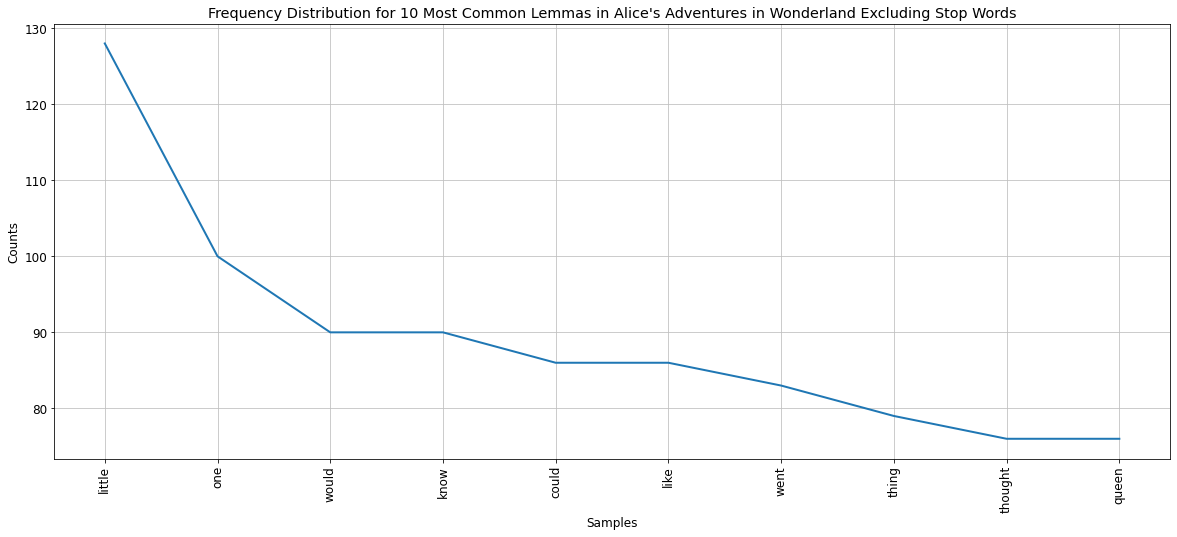

In [68]:
plt.figure(figsize = (20, 8))
plt.rc('font', size=12)
number_of_tokens = 10 
fdist_lemmas_filtered.plot(number_of_tokens, title='Frequency Distribution for '+str(number_of_tokens)+" Most Common Lemmas in Alice's Adventures in Wonderland Excluding Stop Words")
plt.show()

That's more interesting!  We could do the same thing with complete words, to get a different perspective on the most common words in the book.

Another common step to preprocessing text data is **part-of-speech (POS) tagging**.  POS tagging assigns parts of speech to words and groups of words in sentences.  After tagging parts of speech, you can perform more complex tasks such as **entity recognition**, which is the process of identifying people, places, and organizations named in a text.

In [72]:
aiw_tagged = nltk.pos_tag(aiw_tokens)
print(aiw_tagged[0:10])

[('[', 'JJ'), ('Alice', 'NNP'), ("'s", 'POS'), ('Adventures', 'NNS'), ('in', 'IN'), ('Wonderland', 'NNP'), ('by', 'IN'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('1865', 'CD')]


The parts of speech the abbreviations stand for are available [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)